# Выпускная квалификационная работа, Ишутенко Анна

#1. Загрузка данных

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
import re

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.svm import SVR

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model

file_nup_path = 'C:/Users/Admin/Desktop/Data_science/вкр/X_nup.xlsx'
file_bp_path = 'C:/Users/Admin/Desktop/Data_science/вкр/X_bp.xlsx'

dataset_nup = pd.read_excel(file_nup_path)
dataset_bp = pd.read_excel(file_bp_path)

In [238]:
dataset_nup.shape

(1040, 4)

In [91]:
dataset_bp.shape

(1023, 11)

#2. Обработка датасетов - удаление лишних столбцов и проверка

In [92]:
dataset_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset_nup.drop(['Unnamed: 0'], axis=1, inplace=True)

In [93]:
dataset_nup.shape

(1040, 3)

In [94]:
dataset_bp.shape

(1023, 10)

In [95]:
dataset_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [96]:
dataset_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

#3. Объединение датасетов по типу INNER

In [97]:
merged_ds = pd.merge(dataset_nup, dataset_bp, left_index=True, right_index=True, how='inner')

In [98]:
merged_ds.shape

(1023, 13)

In [100]:
merged_ds

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                      0     4.000000          57.000000   
1                      0     4.000000          60.000000   
2                      0     4.000000          70.000000   
3                      0     5.000000          47.000000   
4                      0     5.000000          57.000000   
...                  ...          ...                ...   
1018                  90     9.076380          47.019770   
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  

#4. Разведочный анализ данных.

#4.1. Гистограммы распределения каждой из переменных

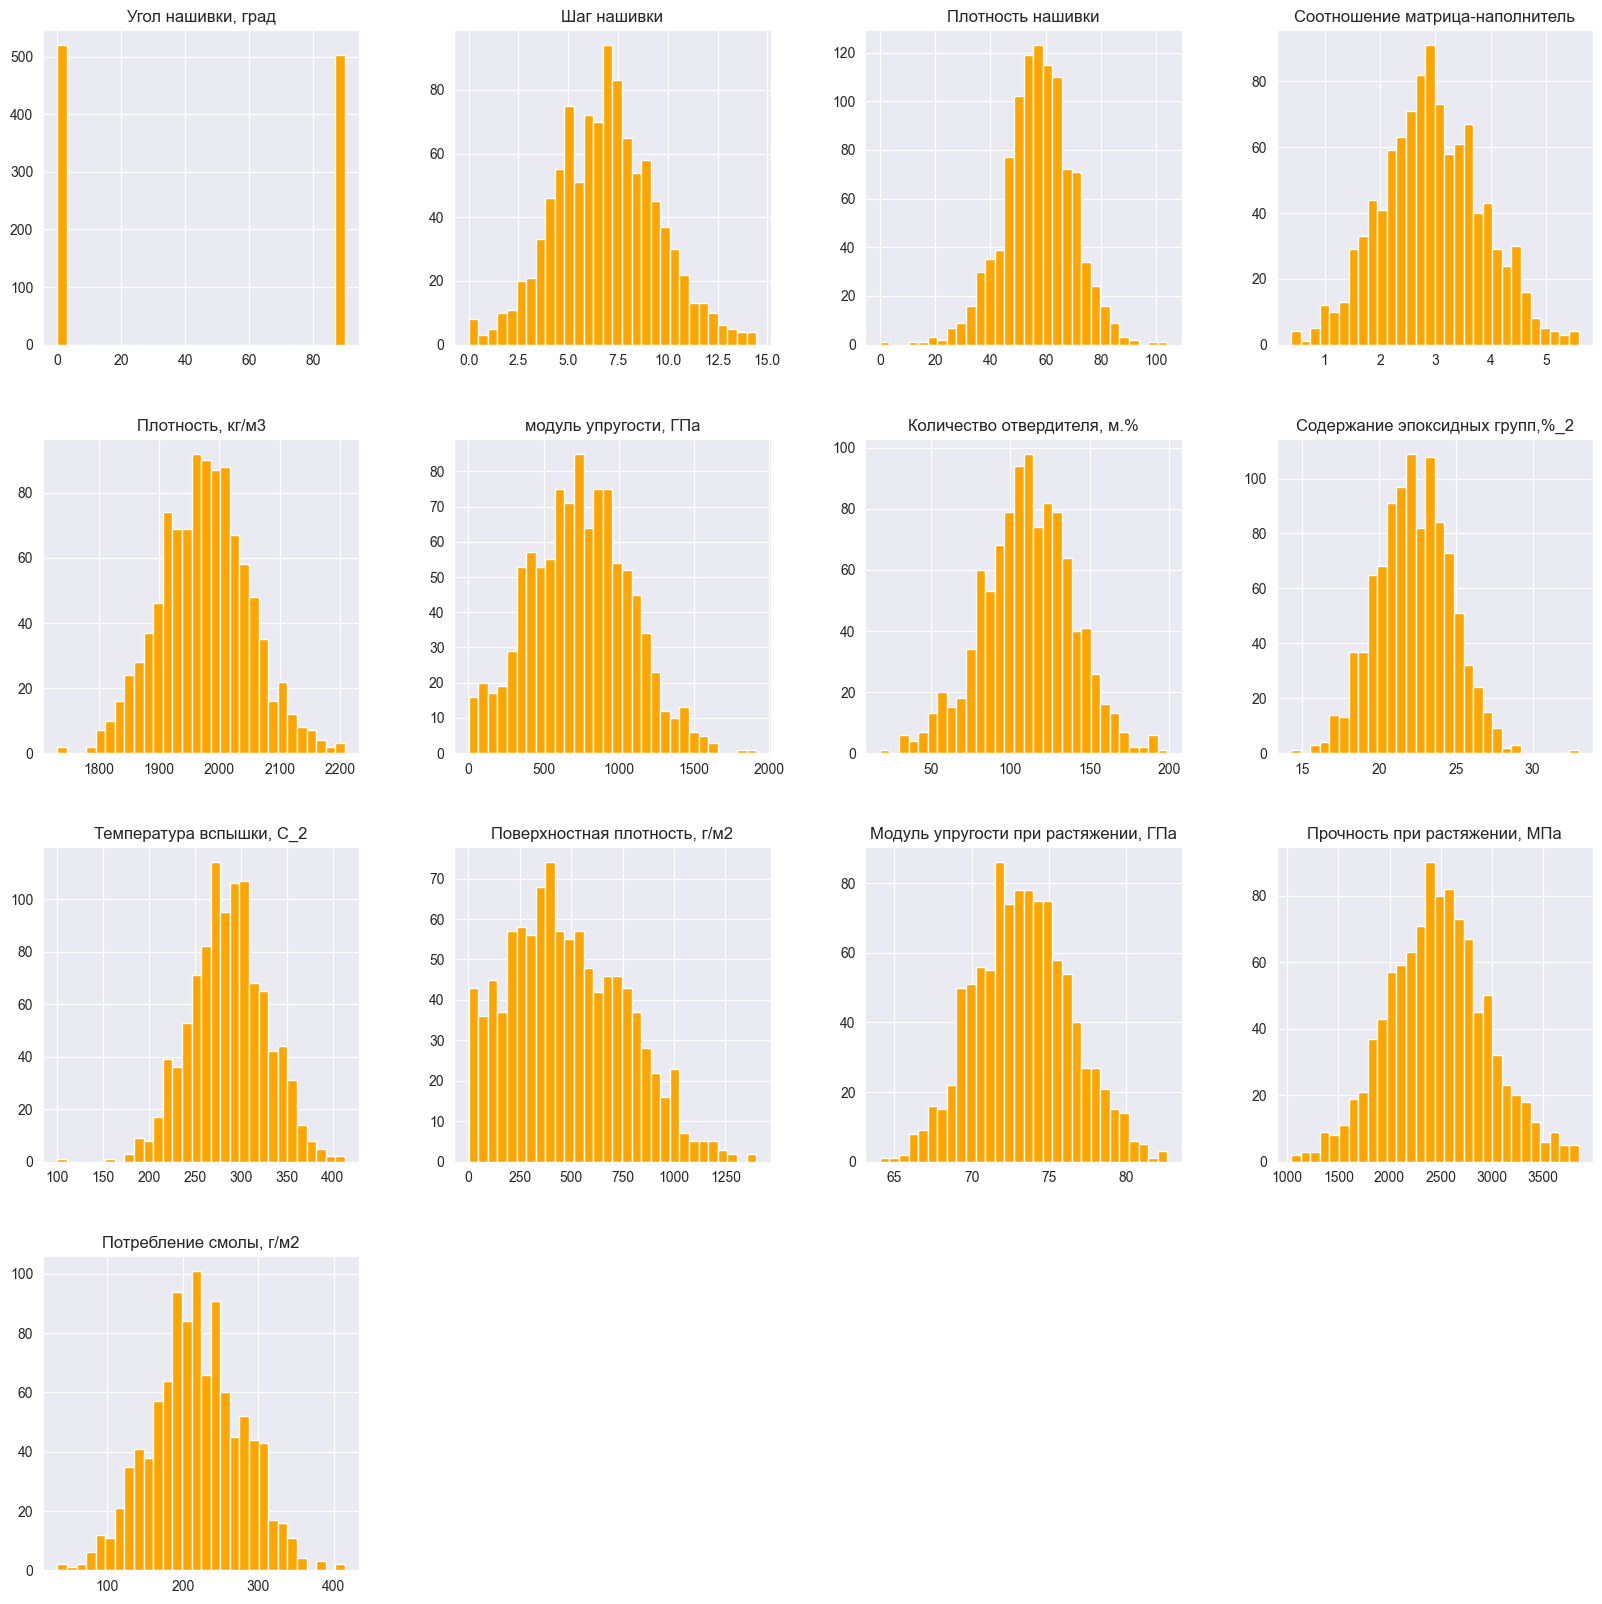

In [101]:
sns.set_style ('darkgrid')
merged_ds.hist(bins = 30, figsize=(20, 20), color = 'orange')
plt.savefig('merged_ds_hist.png', bbox_inches = 'tight')
plt.show()

#4.2. Построение диаграммы ящика с усами. Анализ выбросов

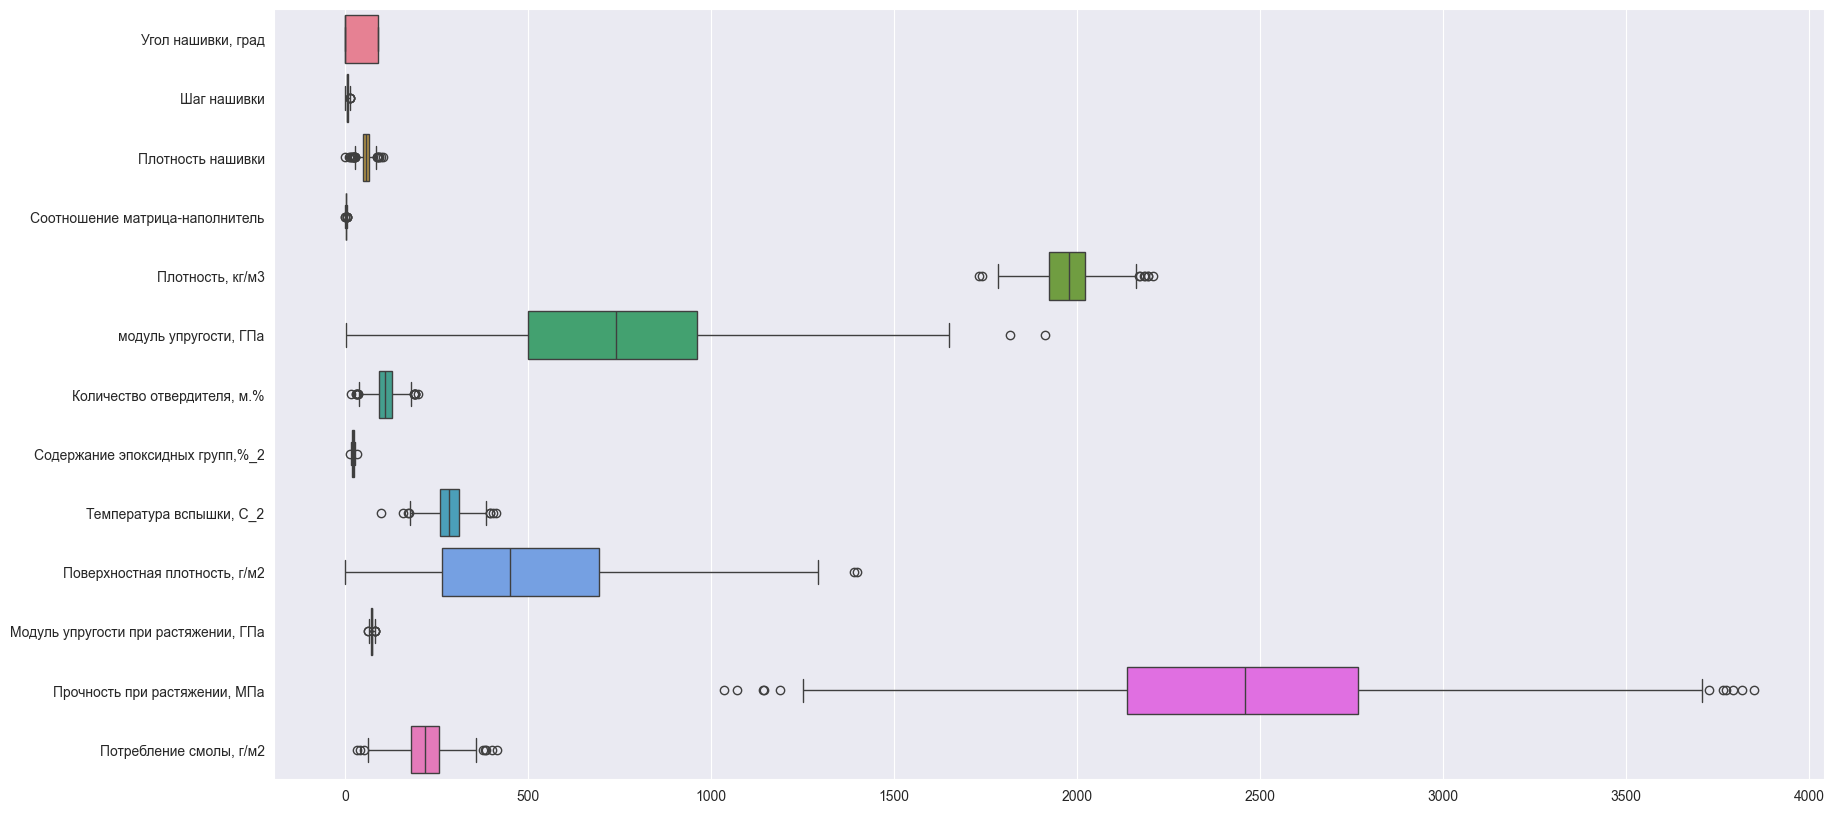

In [102]:
sns.set_style ('darkgrid')
plt.figure(figsize=(20, 10))
sns.boxplot(data=merged_ds, orient="h")
plt.savefig('boxplot.png', bbox_inches = 'tight')
plt.show()

#4.3. Построение попарных графиков рассеяния точек 

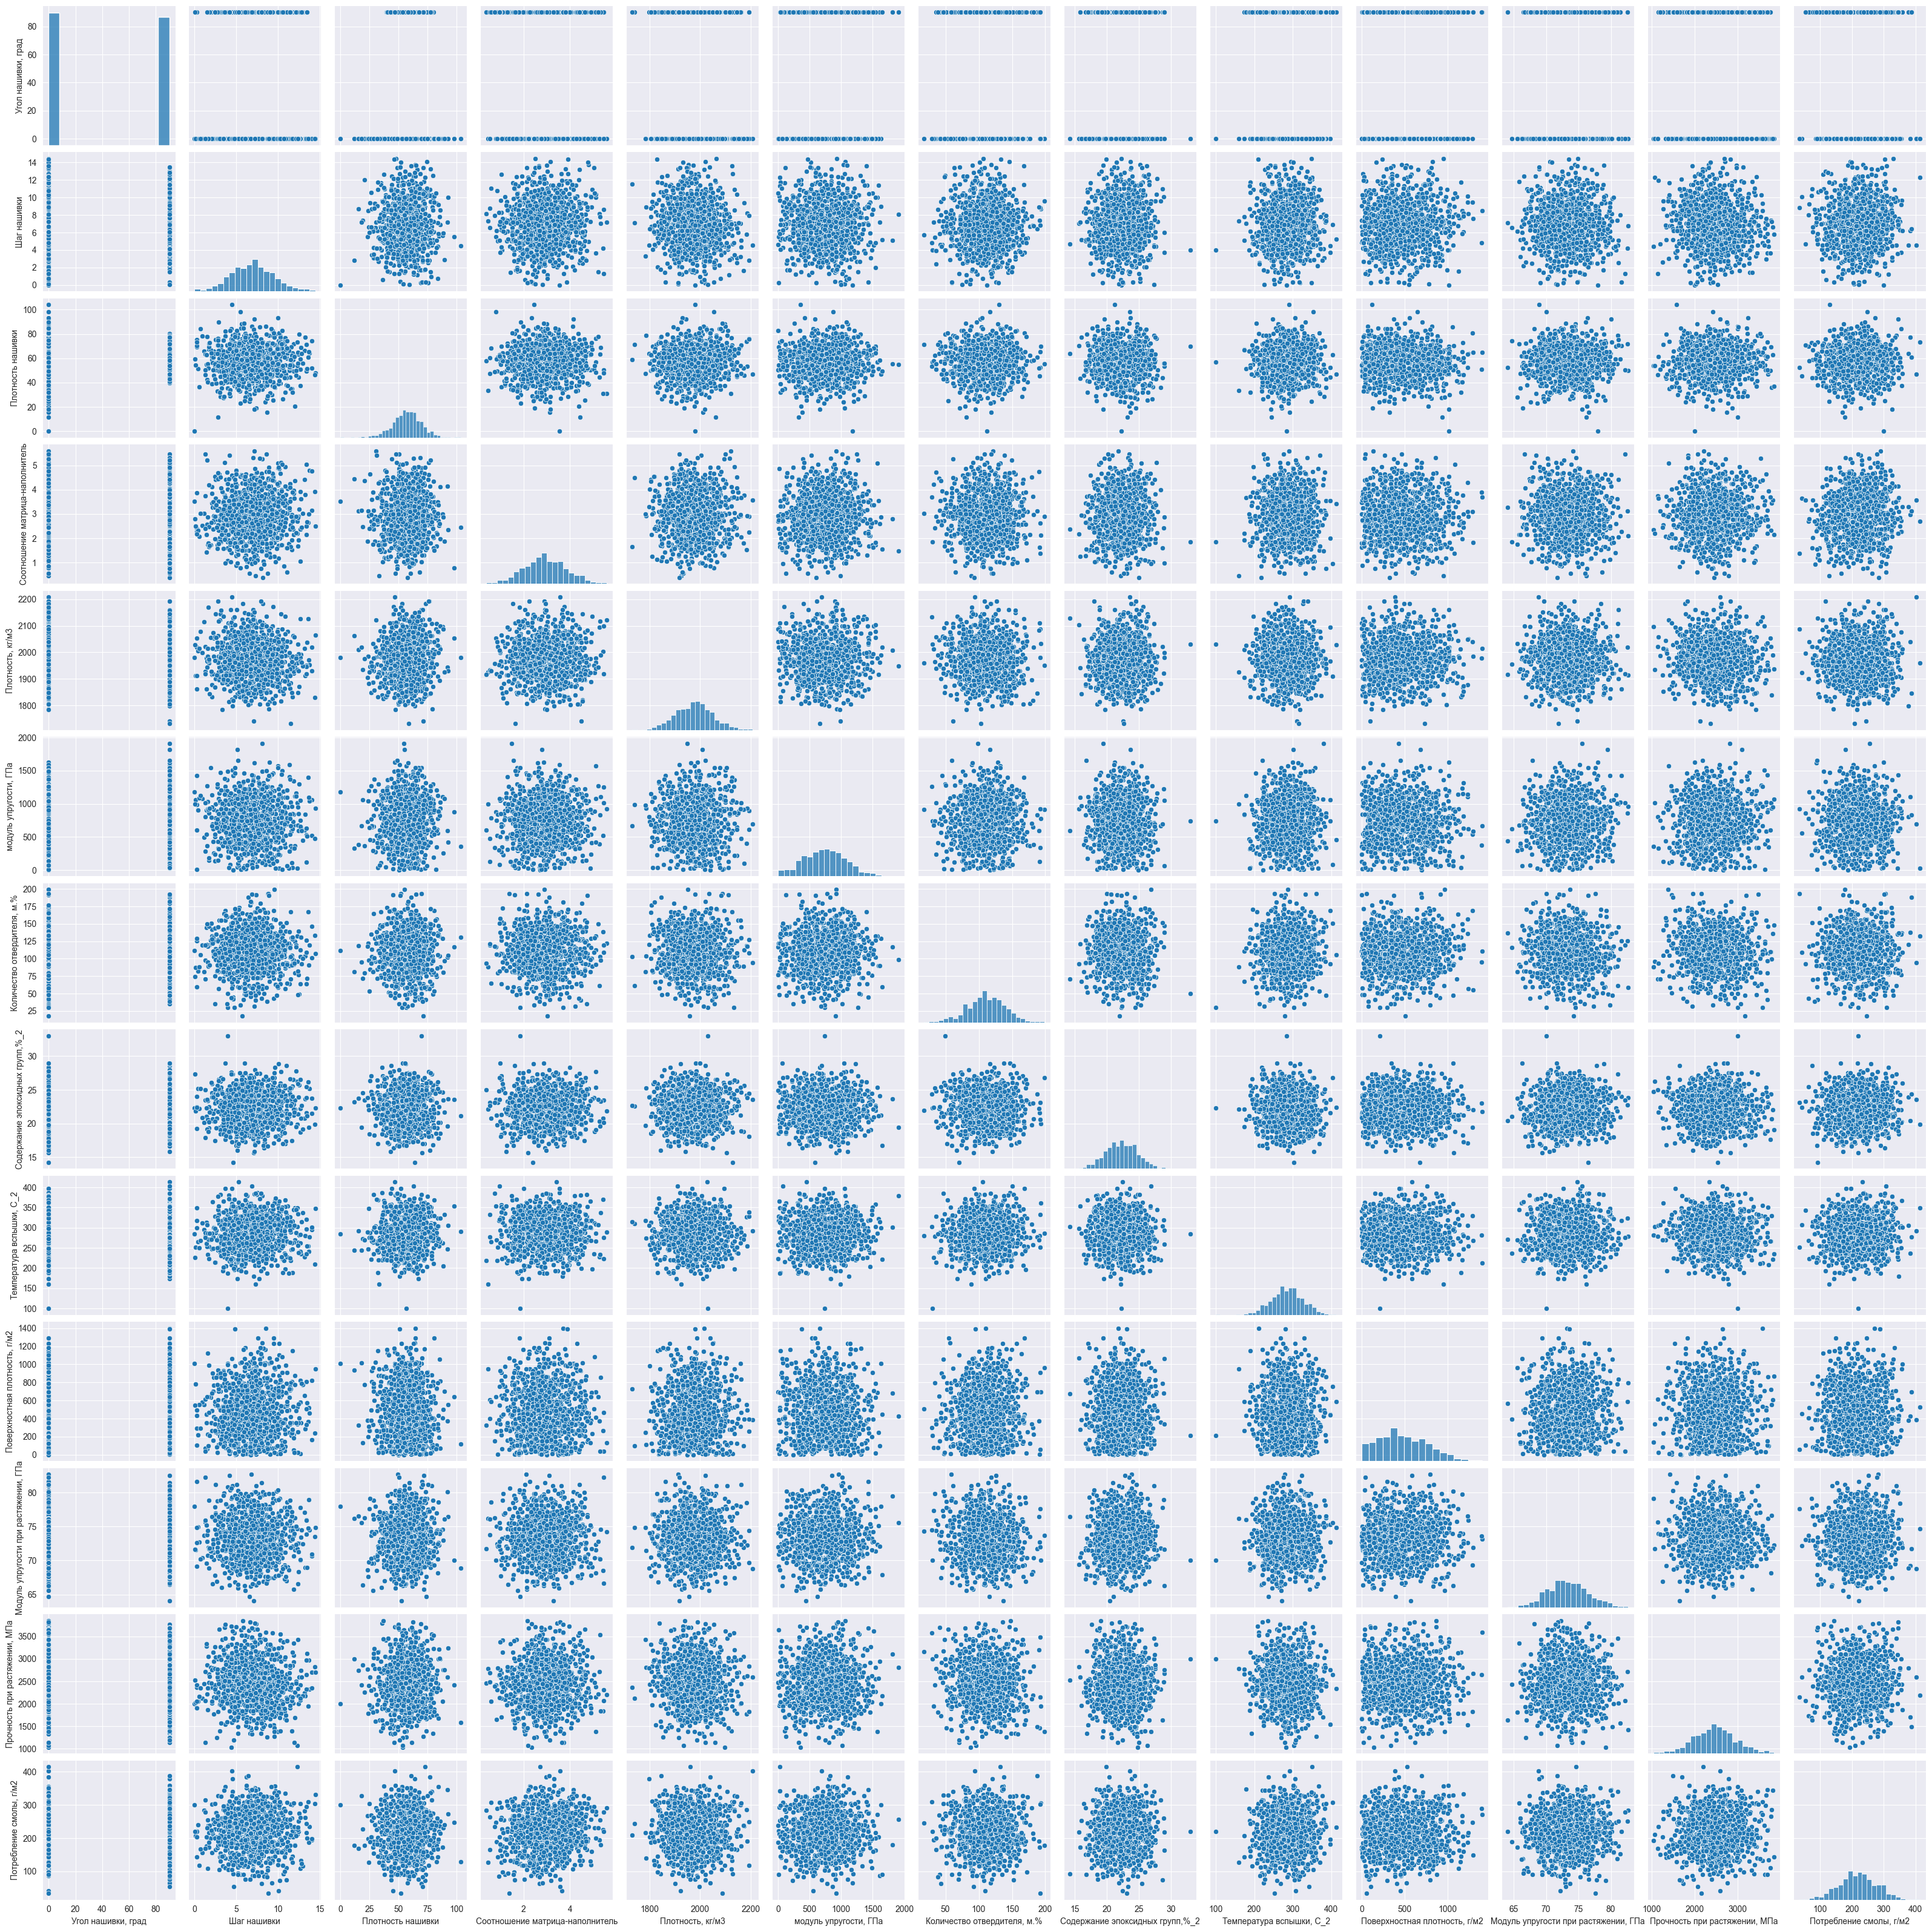

In [103]:
sns.set_style ('darkgrid')
sns.pairplot(merged_ds)
plt.savefig('dispersion.png', bbox_inches = 'tight')
plt.show()

#4.4. Среднее значение для каждой колонки

In [104]:
mean_value = merged_ds.mean()
print("\nСреднее значение для каждой переменной:\n", mean_value)


Среднее значение для каждой переменной:
 Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
dtype: float64


#4.4. Медианное значение для каждой колонки

In [105]:
median_value = merged_ds.median()
print("\nМедианное значение для каждой переменной:\n", median_value)


Медианное значение для каждой переменной:
 Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
dtype: float64


#4.5. Поиск пропусков

In [19]:
missing = merged_ds.isnull().sum()
print ("\nПропуски в датасете:\n", missing)


Пропуски в датасете:
 Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64


#4.6. Типы данных, количесвто ненулевых значений

In [106]:
print(merged_ds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при растяжен

#4.7. Поиск уникальных значений

In [107]:
for column in merged_ds.columns:
    unique_values = merged_ds[column].unique()
    print(f"Уникальные значения в колонке {column}:")
    print(unique_values)
    print("\n")

Уникальные значения в колонке Угол нашивки, град:
[ 0 90]


Уникальные значения в колонке Шаг нашивки:
[ 4.          5.          7.          9.         10.          0.
  7.85616655  7.40154257  6.67578034  7.52639832  8.32569922  7.65621088
 10.30294472  8.94689112  3.74662498  9.09436368  6.30377285  7.25796183
  6.54799294  6.14612532 10.05071828  9.91252624  5.6469144   6.25505768
  7.31043752  5.25689909  2.30265513  6.79367738  6.28114968  4.98508335
  6.1913303   7.78271129 13.19900699  5.08285563 10.62288637  4.79586231
  5.18293533  7.42170415  4.5459247   5.08135737  8.48906023  4.5684626
  9.24558543 11.64404833  6.84503635  7.98414563  4.51649933  5.76437703
  2.08129431  8.72543686  6.58117284  4.7642291   6.30424975  5.59261341
  9.02511978 10.11775061 10.99170308 10.33021553  7.01662242  7.53435721
  7.38816677 11.89177073  9.19645052  9.45435022  1.45037473  4.40224759
  4.5128255   7.20661463  9.59346451  9.31246293  0.23966032  7.86039704
  7.36359936 10.37004083  6.70

#5. Предобработка данных

#5.1. Удаление выбросов

In [117]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
cleaned_ds = remove_outliers(merged_ds)
cleaned_ds.shape

(936, 13)

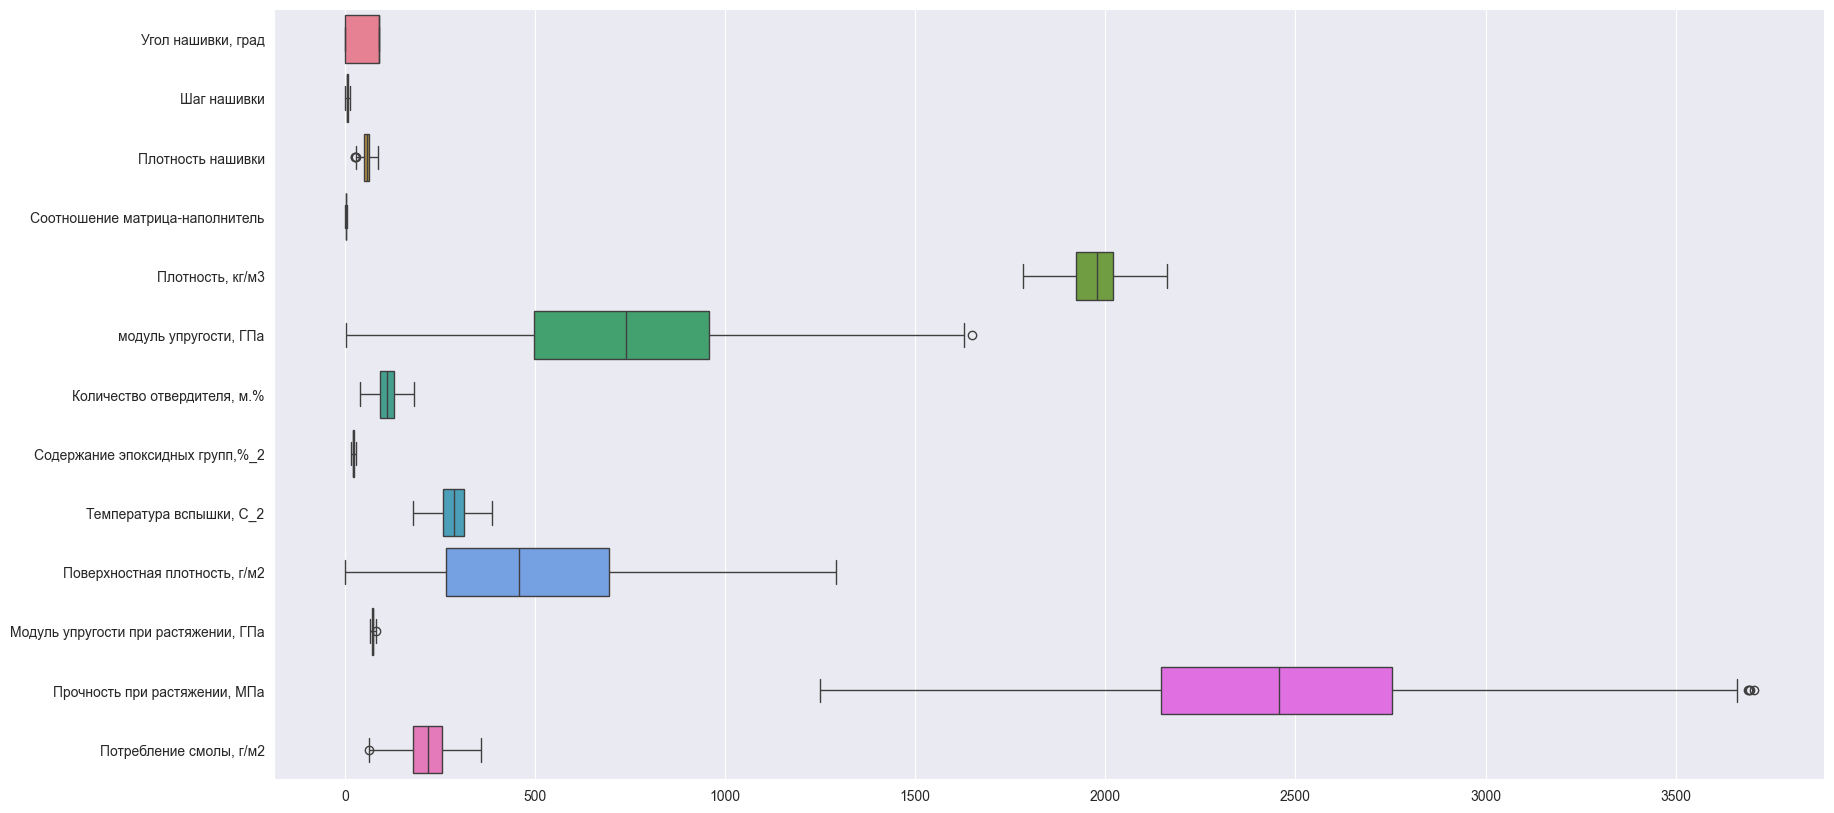

In [118]:
sns.set_style ('darkgrid')
plt.figure(figsize=(20, 10))
sns.boxplot(data=cleaned_ds, orient="h")
plt.show()

In [119]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
cleaned_ds_2 = remove_outliers(cleaned_ds)
cleaned_ds_2.shape

(926, 13)

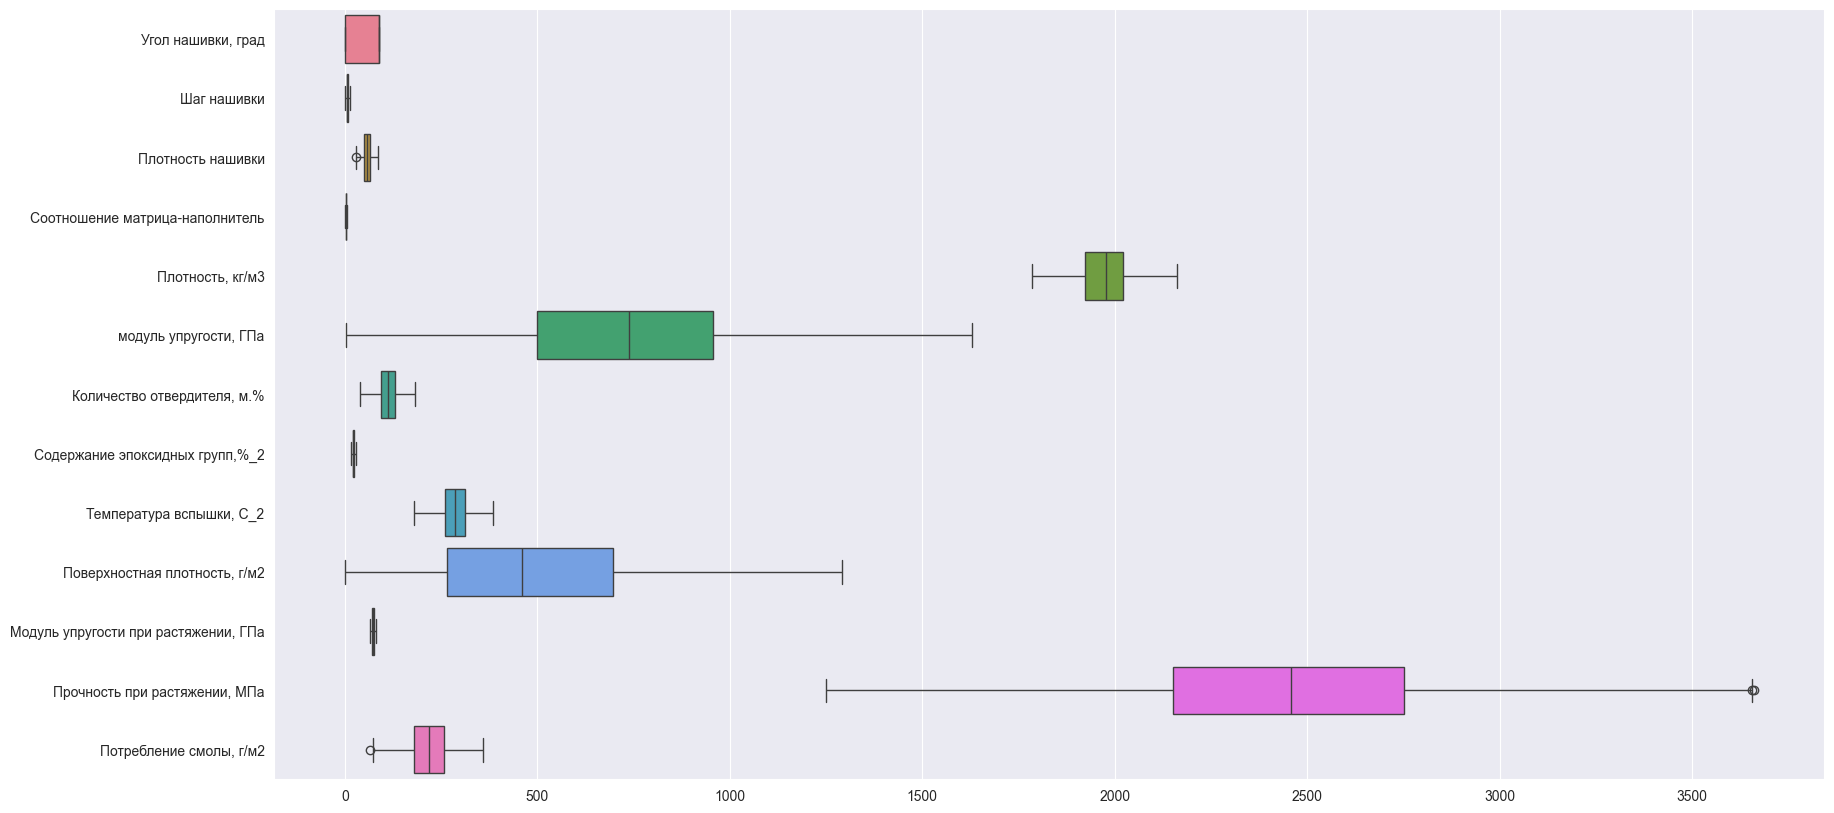

In [120]:
sns.set_style ('darkgrid')
plt.figure(figsize=(20, 10))
sns.boxplot(data=cleaned_ds_2, orient="h")
plt.show()

In [121]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
cleaned_ds_3 = remove_outliers(cleaned_ds_2)
cleaned_ds_3.shape

(922, 13)

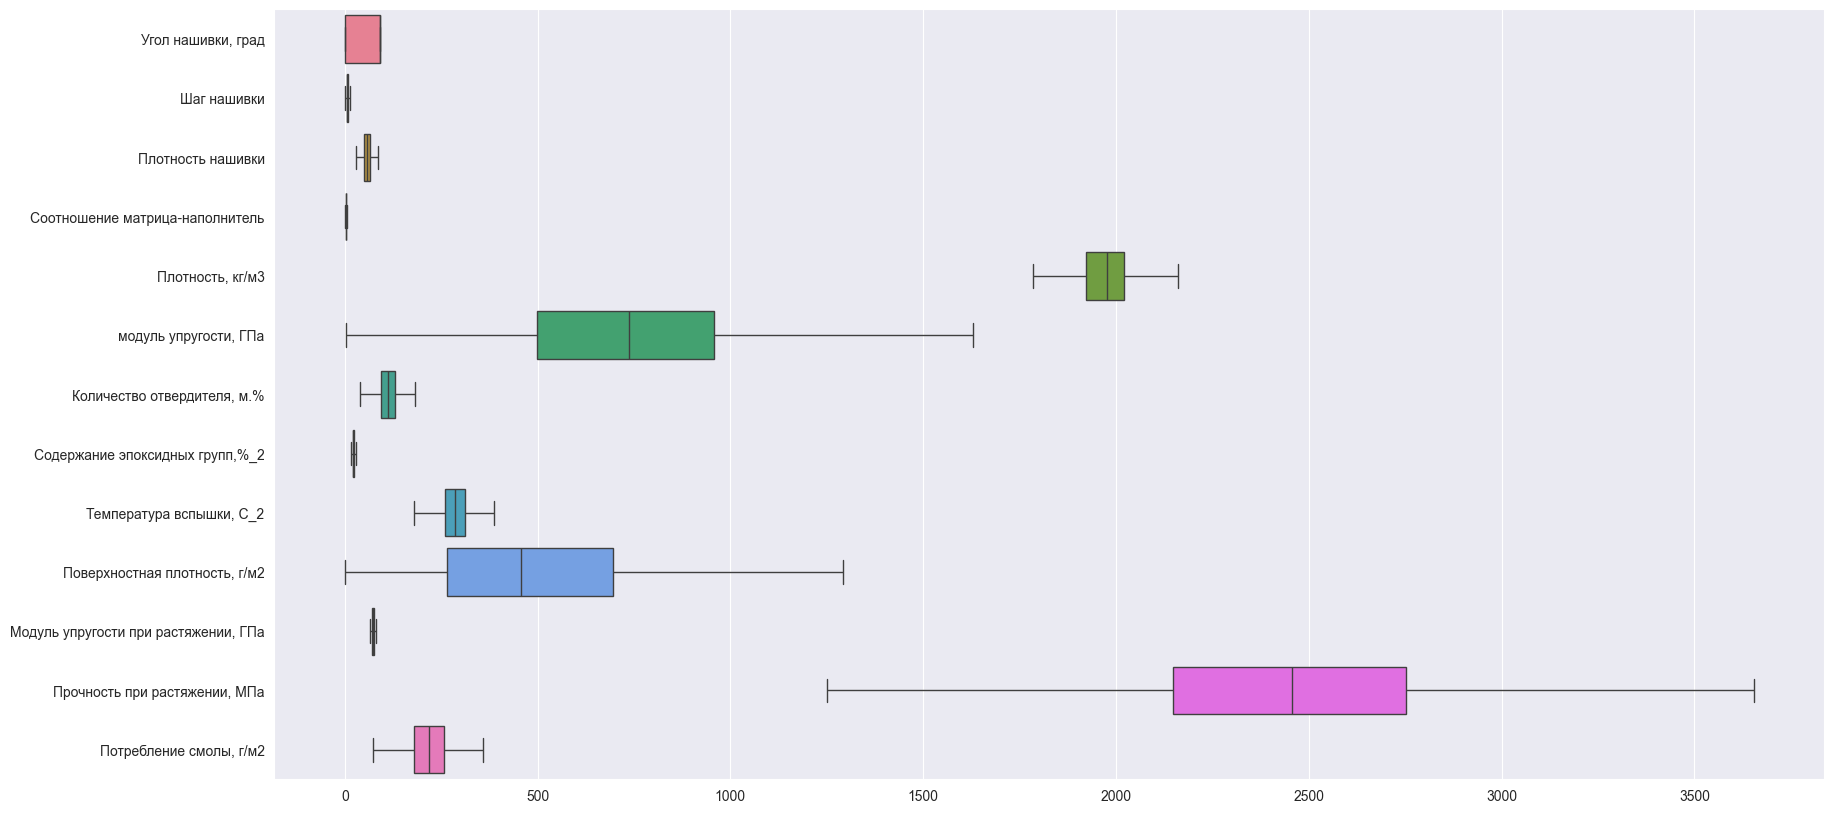

In [122]:
sns.set_style ('darkgrid')
plt.figure(figsize=(20, 10))
sns.boxplot(data=cleaned_ds_3, orient="h")
plt.savefig('boxplot_cleaned.png', bbox_inches = 'tight')
plt.show()

In [123]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
cleaned_ds_4 = remove_outliers(cleaned_ds_3)
cleaned_ds_4.shape

(922, 13)

#5.2. Корреляция

In [125]:
corr_matrix = merged_ds.corr()
print(corr_matrix)

                                      Угол нашивки, град  Шаг нашивки  \
Угол нашивки, град                              1.000000     0.023616   
Шаг нашивки                                     0.023616     1.000000   
Плотность нашивки                               0.107947     0.003487   
Соотношение матрица-наполнитель                -0.031073     0.036437   
Плотность, кг/м3                               -0.068474    -0.061015   
модуль упругости, ГПа                          -0.025417    -0.009875   
Количество отвердителя, м.%                     0.038570     0.014887   
Содержание эпоксидных групп,%_2                 0.008052     0.003022   
Температура вспышки, С_2                        0.020695     0.025795   
Поверхностная плотность, г/м2                   0.052299     0.038332   
Модуль упругости при растяжении, ГПа            0.023003    -0.029468   
Прочность при растяжении, МПа                   0.023398    -0.059547   
Потребление смолы, г/м2                        -0.0

#5.3. Тепловая карта корреляций

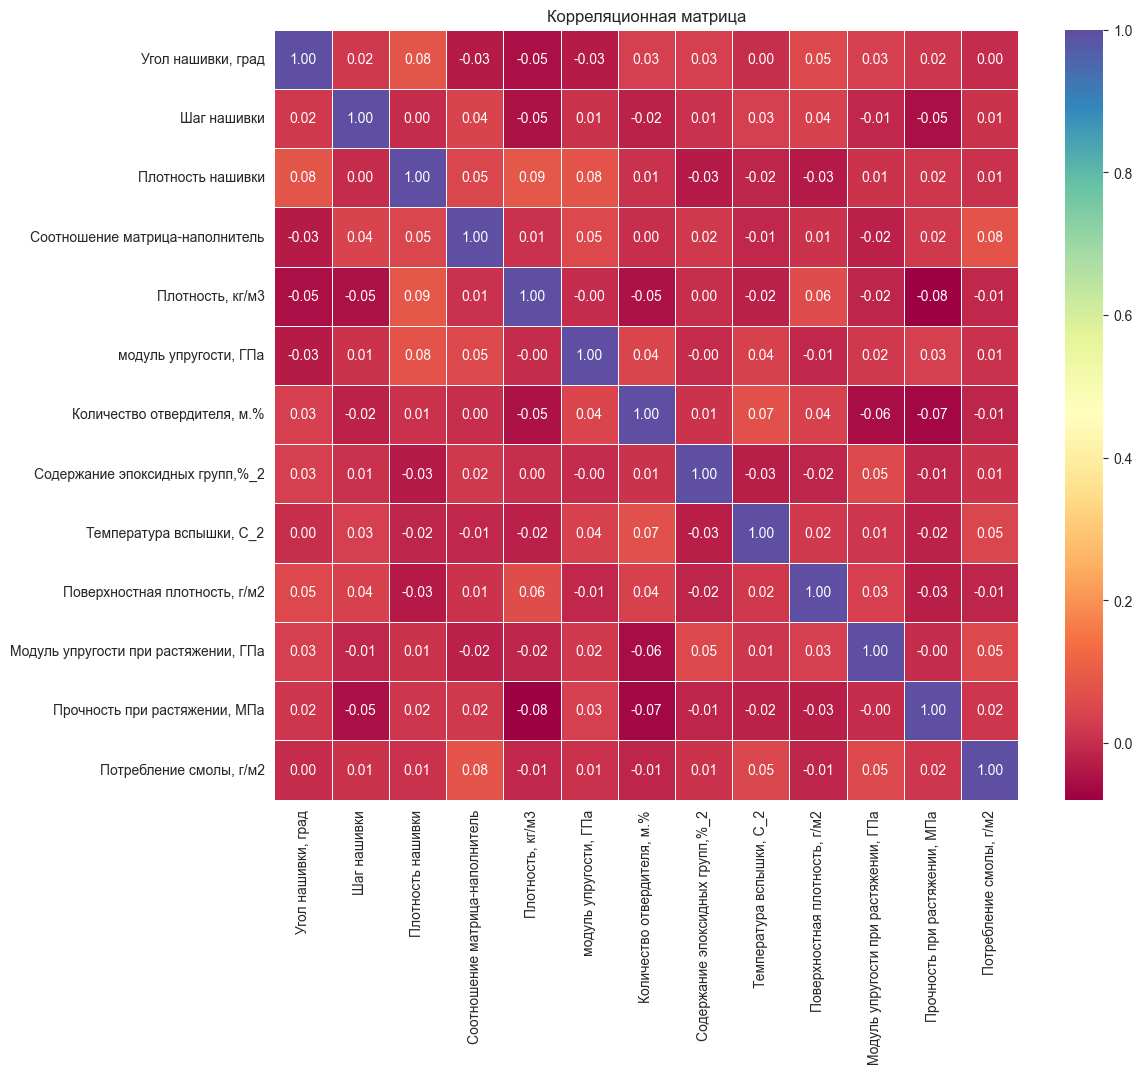

In [202]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.savefig('heatmap.png', bbox_inches = 'tight')
plt.show()

#5.4. Нормализация данных датасета

In [129]:
cleaned_ds_4.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          922.000000   922.000000         922.000000   
mean            45.976139     6.931939          57.562887   
std             45.013829     2.514184          11.122204   
min              0.000000     0.037639          28.661632   
25%              0.000000     5.143644          50.275385   
50%             90.000000     6.972862          57.584225   
75%             90.000000     8.612094          64.840898   
max             90.000000    13.732404          86.012427   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          2.927964       1974.118744   
std                           0.895472         71.040648   
min                           0.547391       1784.482245   
25%                           2.320191       1923.318006   
50%                           2.907832       1977.321002   
75%                           3.549367       2020.053266   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean              736.119982                   111.136066   
std               327.607008                    26.753228   
min                 2.436909                    38.668500   
25%               498.538615                    92.856591   
50%               736.178435                   111.162090   
75%               956.955626                   130.109815   
max              1628.000000                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                         22.200570                286.181128   
std                           2.393926                 39.420764   
min                          15.695894                179.374391   
25%                          20.556328                259.205321   
50%                          22.177681                286.220763   
75%                          23.956980                313.012786   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                      482.429070                             73.303464   
std                       280.437329                              3.025864   
min                         0.603740                             65.793845   
25%                       264.345872                             71.241213   
50%                       457.732246                             73.247594   
75%                       695.531920                             75.310130   
max                      1291.340115                             81.203147   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     922.000000               922.000000  
mean                     2461.491315               218.048059  
std                       453.564734                57.137475  
min                      1250.392802                72.530873  
25%                      2148.175736               179.875097  
50%                      2455.974462               218.697660  
75%                      2751.233766               256.623860  
max                      3654.434359               359.052220

In [130]:
minmaxscaler = MinMaxScaler()
ds_norm = minmaxscaler.fit_transform(np.array(cleaned_ds_4[['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 
                                     'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                                     'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 
                                     'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
                                     'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                                     'Потребление смолы, г/м2']]))

In [131]:
ds_norm[:1]

array([[0.        , 0.28933398, 0.54643302, 0.27476816, 0.65109743,
        0.4529507 , 0.07915272, 0.60743528, 0.50916426, 0.16223008,
        0.27296208, 0.72777743, 0.5146881 ]])

In [132]:
ds_norm_df = pd.DataFrame(ds_norm, columns = ['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 
                                     'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                                     'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 
                                     'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
                                     'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                                     'Потребление смолы, г/м2'])
ds_norm_df

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                   0.0     0.289334           0.546433   
1                   0.0     0.362355           0.319758   
2                   0.0     0.362355           0.494123   
3                   0.0     0.362355           0.546433   
4                   0.0     0.362355           0.720799   
..                  ...          ...                ...   
917                 1.0     0.660014           0.320103   
918                 1.0     0.768759           0.437468   
919                 1.0     0.301102           0.679468   
920                 1.0     0.458245           0.516112   
921                 1.0     0.441137           0.850430   

     Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.274768          0.651097               0.452951   
1                           0.274768          0.651097               0.452951   
2                           0.466552          0.651097               0.461725   
3                           0.465836          0.571539               0.458649   
4                           0.424236          0.332865               0.494944   
..                               ...               ...                    ...   
917                         0.361662          0.444480               0.560064   
918                         0.607674          0.704373               0.272088   
919                         0.573391          0.498274               0.254927   
920                         0.662497          0.748688               0.454635   
921                         0.684036          0.280923               0.255222   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.079153                         0.607435   
1                       0.630983                         0.418887   
2                       0.511257                         0.495653   
3                       0.511257                         0.495653   
4                       0.511257                         0.495653   
..                           ...                              ...   
917                     0.337550                         0.333908   
918                     0.749605                         0.294428   
919                     0.501991                         0.623085   
920                     0.717585                         0.267818   
921                     0.632264                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.162230   
1                    0.583596                       0.162230   
2                    0.509164                       0.162230   
3                    0.509164                       0.162230   
4                    0.509164                       0.162230   
..                        ...                            ...   
917                  0.703458                       0.161609   
918                  0.362087                       0.271207   
919                  0.334063                       0.572959   
920                  0.466417                       0.496511   
921                  0.588206                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.272962                       0.727777   
1                                0.272962                       0.727777   
2                                0.272962                       0.727777   
3                                0.272962                       0.727777   
4                                0.272962                       0.727777   
..                                    ...                            ...   
917                              0.473553                       0.472912   
918                              0.462512                       0.461722   
919                              0.580201

In [133]:
ds_norm_df.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          922.000000   922.000000         922.000000   
mean             0.510846     0.503426           0.503938   
std              0.500154     0.183587           0.193933   
min              0.000000     0.000000           0.000000   
25%              0.000000     0.372844           0.376869   
50%              1.000000     0.506414           0.504310   
75%              1.000000     0.626112           0.630842   
max              1.000000     1.000000           1.000000   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.499412          0.502904   
std                           0.187858          0.188395   
min                           0.000000          0.000000   
25%                           0.371909          0.368184   
50%                           0.495189          0.511396   
75%                           0.629774          0.624719   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.451341                     0.506200   
std                 0.201534                     0.186876   
min                 0.000000                     0.000000   
25%                 0.305188                     0.378514   
50%                 0.451377                     0.506382   
75%                 0.587193                     0.638735   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                          0.490578                  0.516739   
std                           0.180548                  0.190721   
min                           0.000000                  0.000000   
25%                           0.366571                  0.386228   
50%                           0.488852                  0.516931   
75%                           0.623046                  0.646553   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                        0.373295                              0.487343   
std                         0.217269                              0.196366   
min                         0.000000                              0.000000   
25%                         0.204335                              0.353512   
50%                         0.354161                              0.483718   
75%                         0.538397                              0.617568   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     922.000000               922.000000  
mean                        0.503776                 0.507876  
std                         0.188668                 0.199418  
min                         0.000000                 0.000000  
25%                         0.373447                 0.374647  
50%                         0.501481                 0.510143  
75%                         0.624299                 0.642511  
max                         1.000000                 1.000000

In [134]:
std_scaler = StandardScaler()
ds_std = std_scaler.fit_transform(np.array(cleaned_ds_4[['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 
                                     'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                                     'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 
                                     'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
                                     'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                                     'Потребление смолы, г/м2']]))

In [135]:
ds_std_df = pd.DataFrame(ds_std, columns = ['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 
                                     'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                                     'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 
                                     'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
                                     'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                                     'Потребление смолы, г/м2'])
ds_std_df.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -1.021932    -1.166792           0.219240   
1           -1.021932    -0.768833          -0.950227   
2           -1.021932    -0.768833          -0.050637   
3           -1.021932    -0.768833           0.219240   
4           -1.021932    -0.768833           1.118831   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -1.196467          0.787037               0.007992   
1                        -1.196467          0.787037               0.007992   
2                        -0.175012          0.787037               0.051553   
3                        -0.178825          0.364514               0.036283   
4                        -0.400390         -0.903054               0.216474   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -2.286425                         0.647585   
1                     0.668092                        -0.397291   
2                     0.027074                         0.028123   
3                     0.027074                         0.028123   
4                     0.027074                         0.028123   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -0.039740                      -0.971971   
1                  0.350738                      -0.971971   
2                 -0.039740                      -0.971971   
3                 -0.039740                      -0.971971   
4                 -0.039740                      -0.971971   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -1.092335                       1.187925   
1                             -1.092335                       1.187925   
2                             -1.092335                       1.187925   
3                             -1.092335                       1.187925   
4                             -1.092335                       1.187925   

   Потребление смолы, г/м2  
0                 0.034181  
1                 0.034181  
2                 0.034181  
3                 0.034181  
4                 0.034181

In [136]:
ds_std_df.describe()

Угол нашивки, град   Шаг нашивки  Плотность нашивки  \
count        9.220000e+02  9.220000e+02       9.220000e+02   
mean         6.165230e-17 -1.396810e-16      -1.055796e-15   
std          1.000543e+00  1.000543e+00       1.000543e+00   
min         -1.021932e+00 -2.743651e+00      -2.599929e+00   
25%         -1.021932e+00 -7.116685e-01      -6.555766e-01   
50%          9.785383e-01  1.628558e-02       1.919567e-03   
75%          9.785383e-01  6.686332e-01       6.547228e-01   
max          9.785383e-01  2.706308e+00       2.559293e+00   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                     9.220000e+02      9.220000e+02   
mean                     -5.779903e-17     -1.741677e-15   
std                       1.000543e+00      1.000543e+00   
min                      -2.659900e+00     -2.670857e+00   
25%                      -6.790861e-01     -7.154821e-01   
50%                      -2.249388e-02      4.510088e-02   
75%                       6.943159e-01      6.469458e-01   
max                       2.666164e+00      2.640013e+00   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count           9.220000e+02                 9.220000e+02   
mean            2.080765e-16                 2.600956e-16   
std             1.000543e+00                 1.000543e+00   
min            -2.240737e+00                -2.710211e+00   
25%            -7.255959e-01                -6.836332e-01   
50%             1.785201e-04                 9.732731e-04   
75%             6.744529e-01                 7.095984e-01   
max             2.723886e+00                 2.643821e+00   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                     9.220000e+02              9.220000e+02   
mean                      1.040383e-16             -3.467942e-17   
std                       1.000543e+00              1.000543e+00   
min                      -2.718633e+00             -2.710874e+00   
25%                      -6.872118e-01             -6.846759e-01   
50%                      -9.566481e-03              1.005999e-03   
75%                       7.340927e-01              6.810173e-01   
max                       2.823057e+00              2.535239e+00   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                   9.220000e+02                          9.220000e+02   
mean                    2.504625e-17                         -4.009326e-15   
std                     1.000543e+00                          1.000543e+00   
min                    -1.719054e+00                         -2.483157e+00   
25%                    -7.780760e-01                         -6.819110e-01   
50%                    -8.811319e-02                         -1.847416e-02   
75%                     7.603072e-01                          6.635309e-01   
max                     2.886028e+00                          2.612136e+00   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                   9.220000e+02             9.220000e+02  
mean                   -7.668005e-16            -2.350494e-16  
std                     1.000543e+00             1.000543e+00  
min                    -2.671627e+00            -2.548173e+00  
25%                    -6.911596e-01            -6.684524e-01  
50%                    -1.216992e-02             1.137525e-02  
75%                     6.391584e-01             6.755065e-01  
max                     2.631577e+00             2.469145e+00

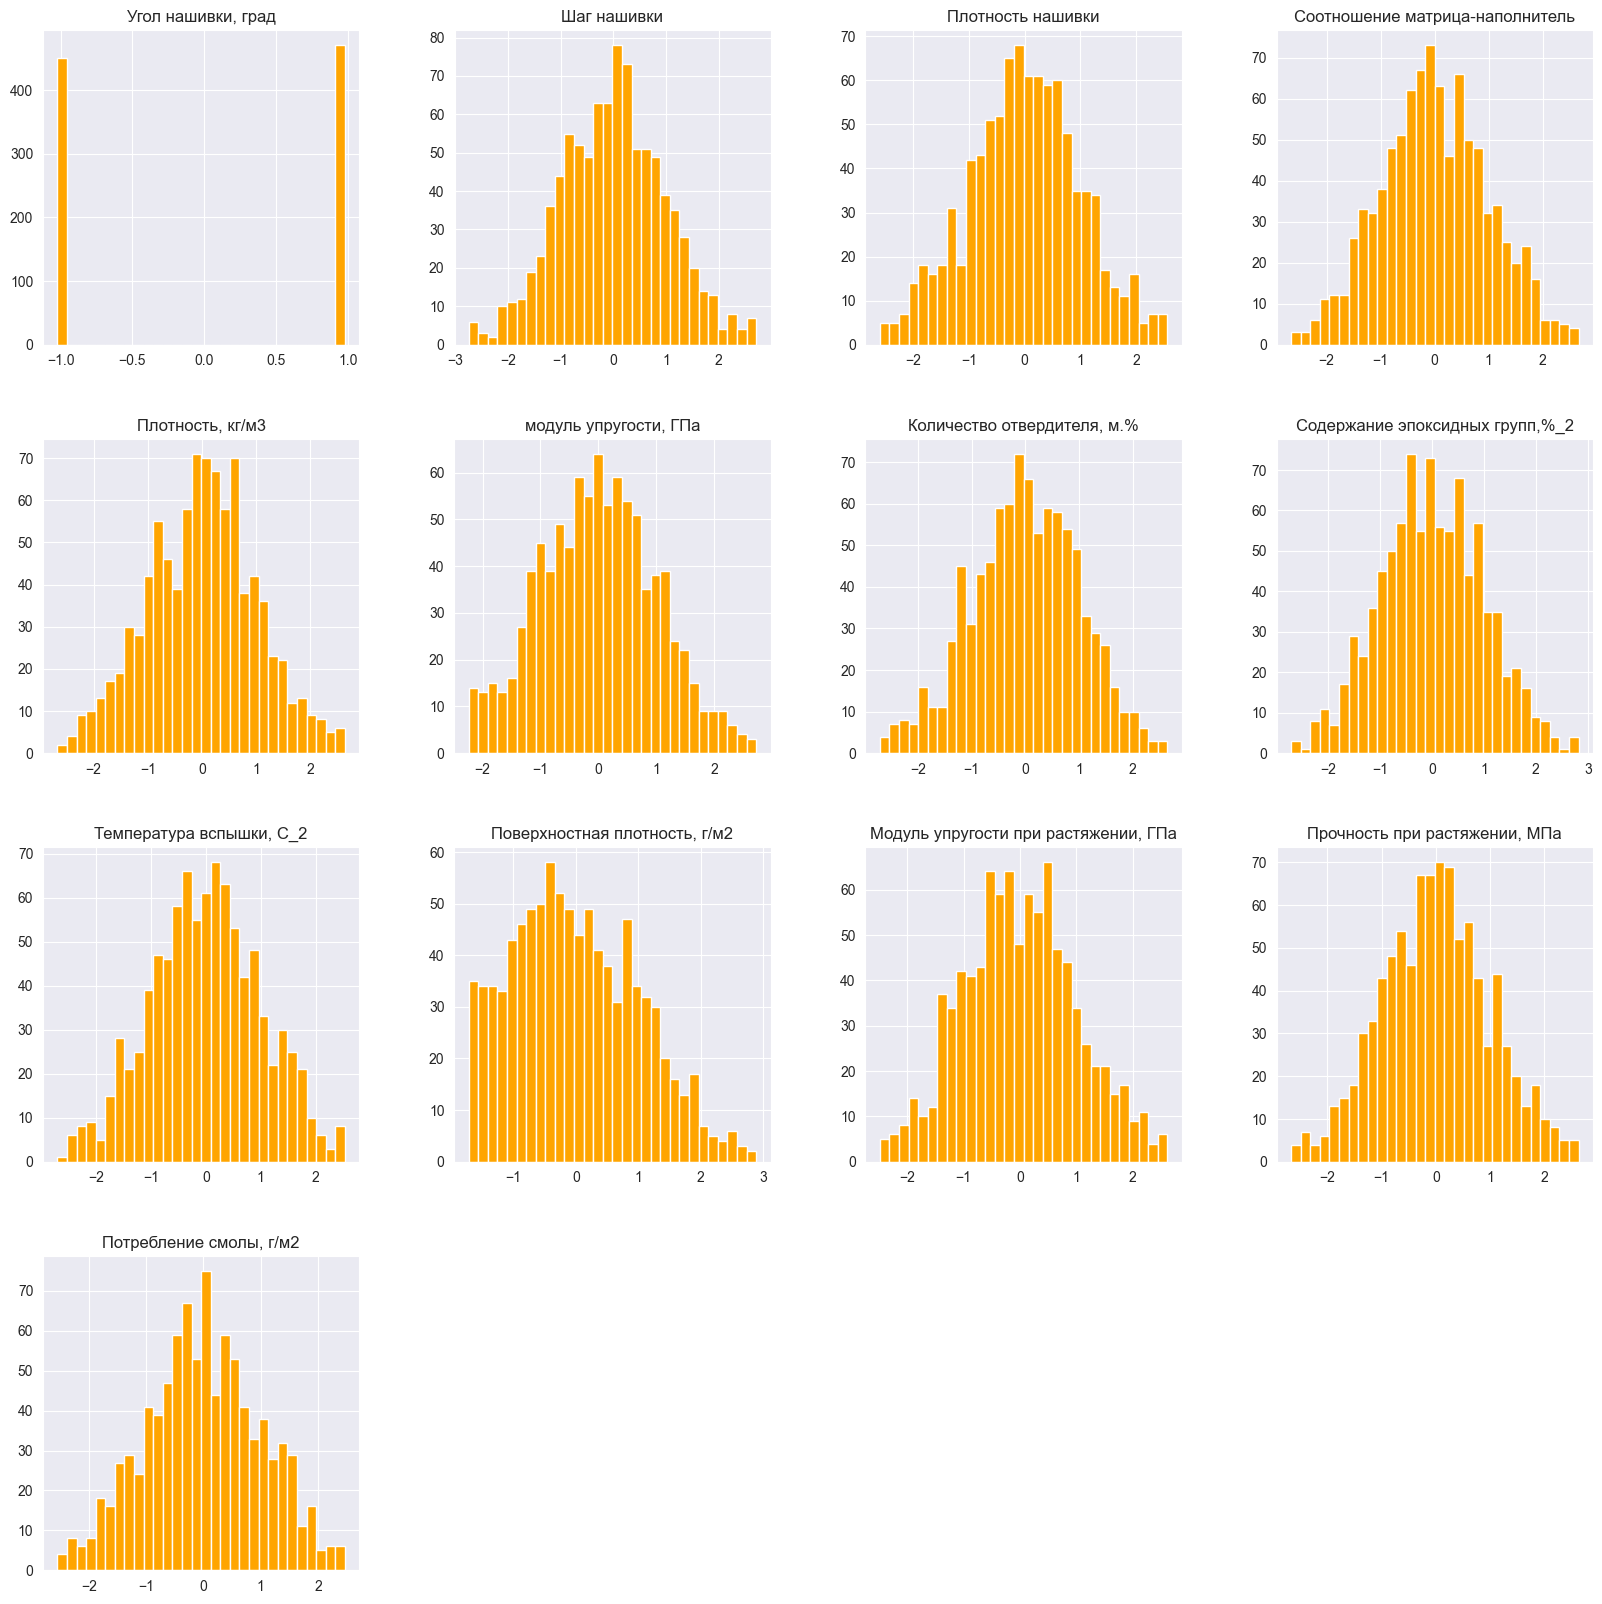

In [137]:
sns.set_style ('darkgrid')
ds_std_df.hist(bins = 30, figsize=(20, 20), color = 'orange')
plt.savefig('ds_std_hist.png', bbox_inches = 'tight')
plt.show()

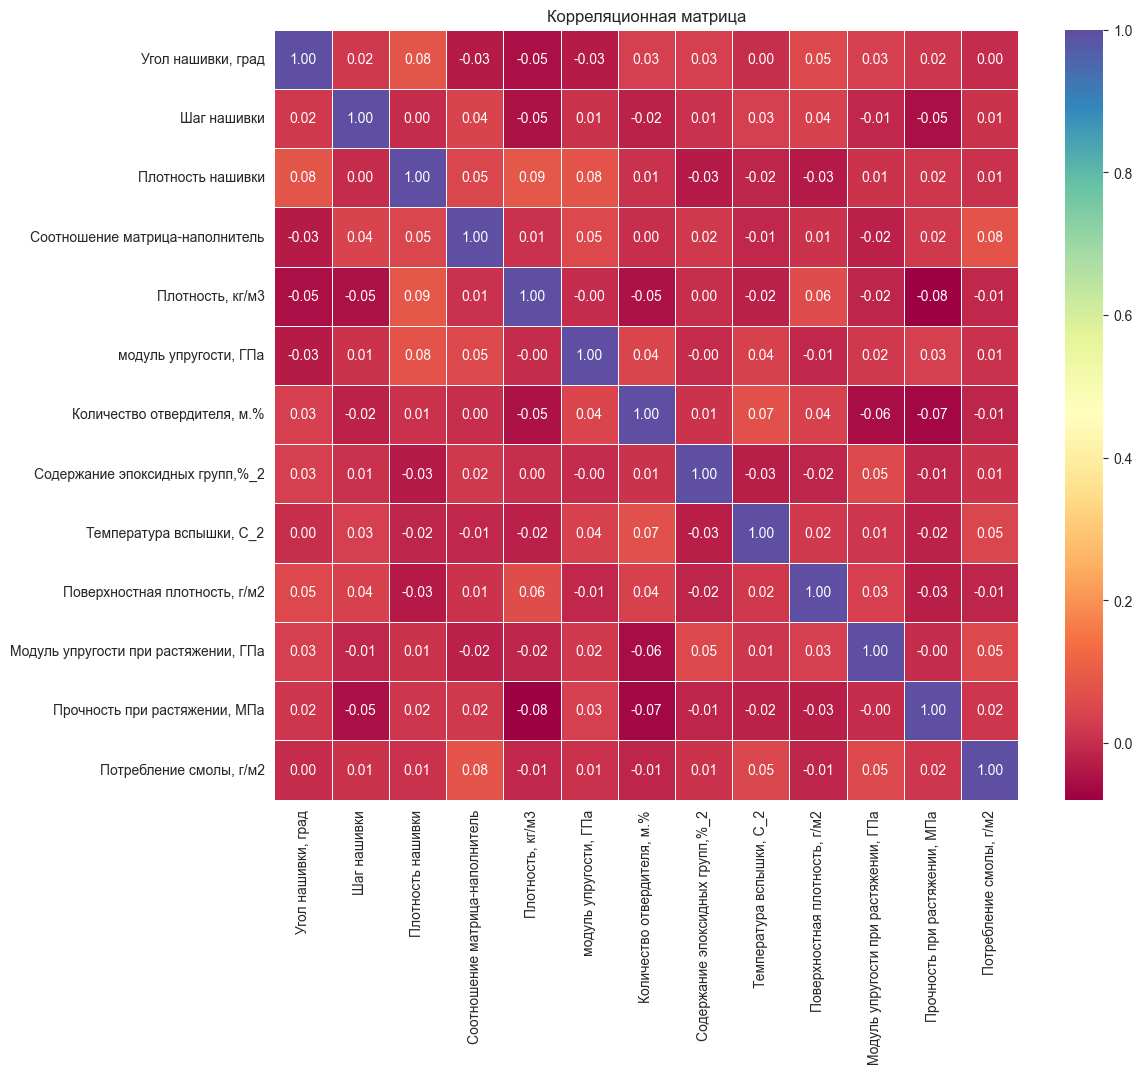

In [165]:
corr_matrix = ds_std_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.savefig('heatmap2.png', bbox_inches = 'tight')
plt.show()

#6. Обучение моделей

#6.1. Отбор необходимых переменных. Тестовые и тренировочные наборы. Соотношение 30:70%.

In [140]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    ds_norm_df.loc[:, ds_norm_df.columns != 'Прочность при растяжении, МПа'],
    ds_norm_df[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [141]:
ds_norm_df.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [142]:
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

#6.2.Линейная регрессия

In [143]:
lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lin_elast = mean_squared_error(y_test_1, y_pred_lr)
print('Linear Regression Results Train:') 
print("Test score: {:.2f}".format(lr.score(x_train_1, y_train_1)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_1, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_lr)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast)))
print("Test score: {:.2f}".format(lr.score(x_test_1, y_test_1)))

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  0
lr_MAPE: 9232724774322.14
lr_MSE: 0.04
lr_RMSE: 0.19
Test score: -0.01


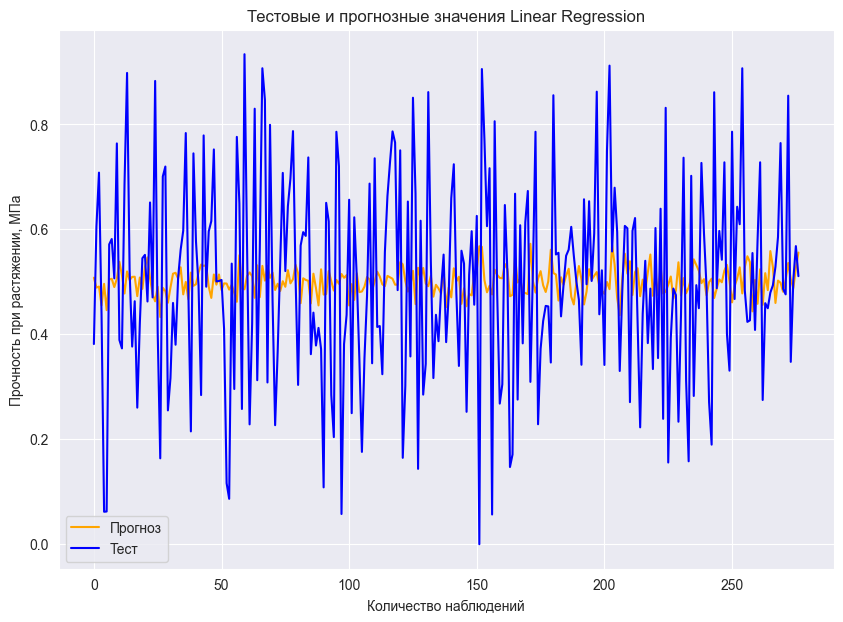

In [166]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr, label="Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('LR.png', bbox_inches = 'tight')

#6.3. Случайный лес (Random Forest)

In [145]:
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y_pred_forest = rfr.predict(x_test_1)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_1)
mse_rfr_elast = mean_squared_error(y_test_1,y_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr.score(x_train_1, y_train_1)))
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_1, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast)))
print("Test score: {:.2f}".format(rfr.score(x_test_1, y_test_1)))

Random Forest Regressor Results Train:
Test score: 0.48
Random Forest Regressor Results:
RF_MAE:  0
RF_MAPE: 8807524796723.70
RF_MSE: 0.04
RF_RMSE: 0.20
Test score: -0.09


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


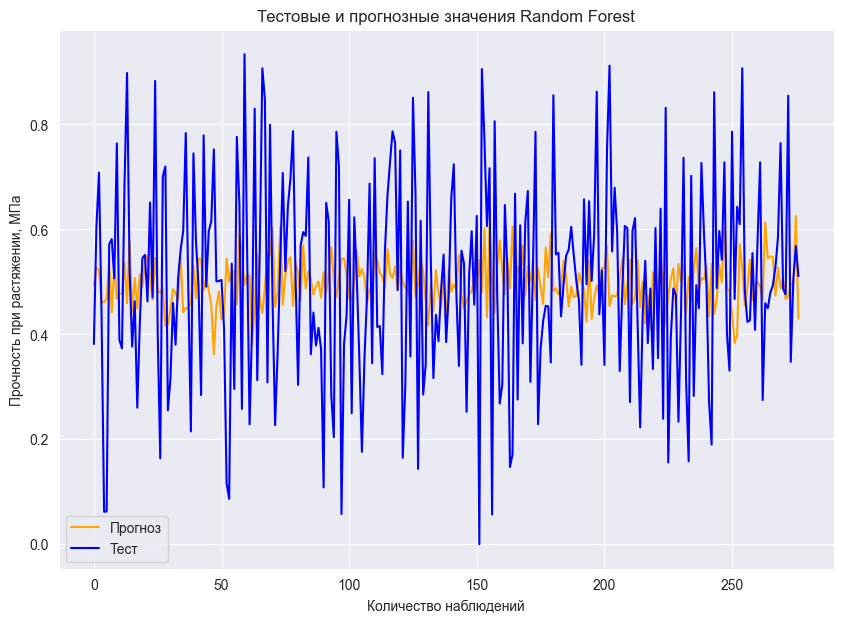

In [167]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest")
plt.plot(y_pred_forest, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('RF.png', bbox_inches = 'tight')

#6.4. K-ближайших соседей

In [147]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y_pred_knn = knn.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
mse_knn_elast = mean_squared_error(y_test_1,y_pred_knn)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast)))
print("Test score: {:.2f}".format(knn.score(x_test_1, y_test_1)))

K Neighbors Regressor  Results Train:
Test score: 0.23
K Neighbors Regressor  Results:
KNN_MAE:  0
KNN_MAPE: 6526587660746.40
KNN_MSE: 0.04
KNN_RMSE: 0.21
Test score: -0.18


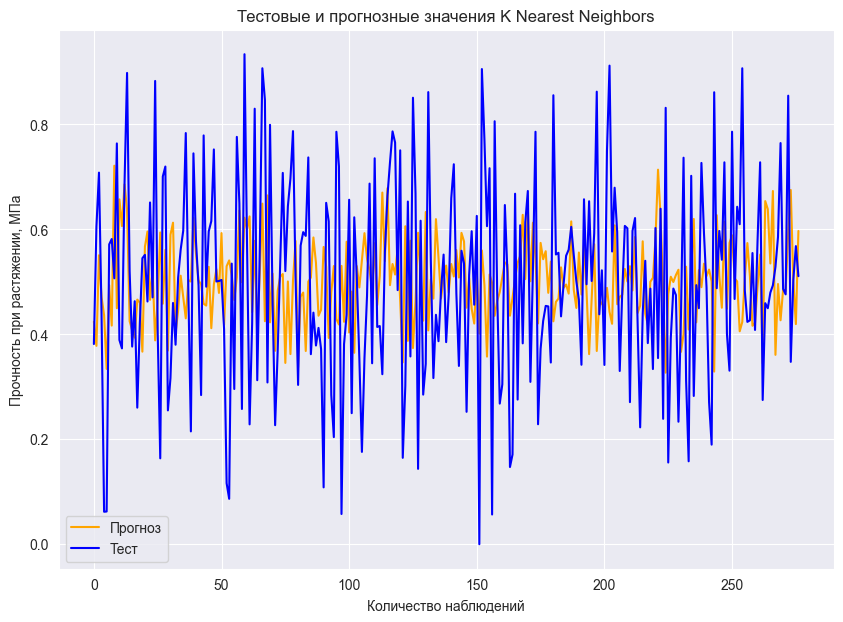

In [168]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Nearest Neighbors")
plt.plot(y_pred_knn, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('KNN.png', bbox_inches = 'tight')

#6.5. Метод опорных векторов (SVR)

In [149]:
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
svr.fit(x_train_1, np.ravel(y_train_1))
y_pred_svr=svr.predict(x_test_1)
mae_svr = mean_absolute_error(y_pred_svr, y_test_1)
mse_svr_elast = mean_squared_error(y_test_1,y_pred_svr)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr.score(x_train_1, y_train_1)))
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_1, y_pred_svr)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_svr)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast)))
print("Test score: {:.2f}".format(svr.score(x_test_1, y_test_1)))

Support Vector Regression Results Train:
Test score: -0.00
Support Vector Regression Results:
SVR_MAE: 0
SVR_MAPE: 8176304369191.76
SVR_MSE: 0.04
SVR_RMSE: 0.19
Test score: -0.00


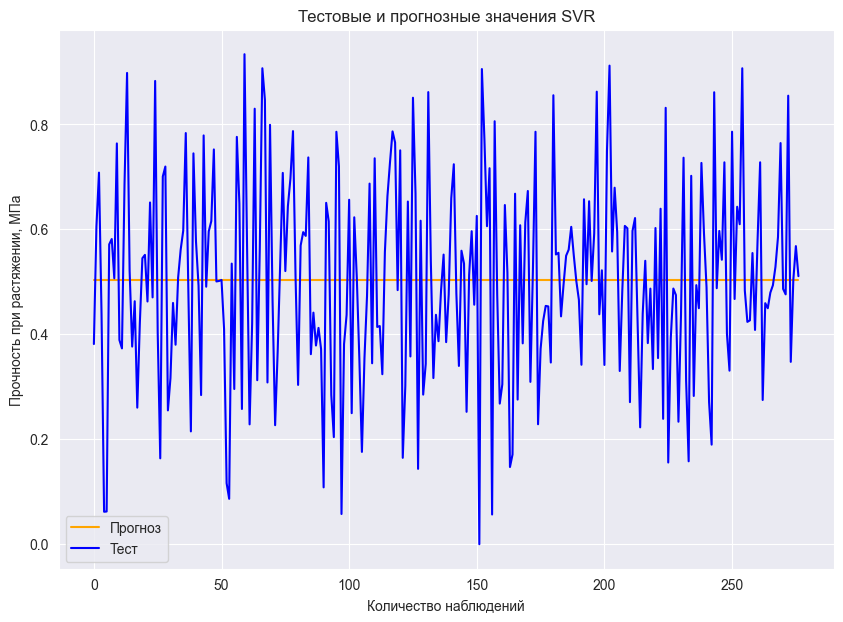

In [169]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения SVR")
plt.plot(y_pred_svr, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('SVR.png', bbox_inches = 'tight')

#6.6. Градиентный бустинг

In [153]:
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
mse_gbr_elast = mean_squared_error(y_test_1,y_pred_gbr)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr.score(x_train_1, y_train_1)))
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast)))
print("Test score: {:.2f}".format(gbr.score(x_test_1, y_test_1)))

Gradient Boosting Regressor Results Train:
Test score: 0.51
Gradient Boosting Regressor Results:
GBR_MAE:  0
GBR_MAPE: 8395674120401.24
GBR_MSE: 0.04
GBR_RMSE: 0.20
Test score: -0.05


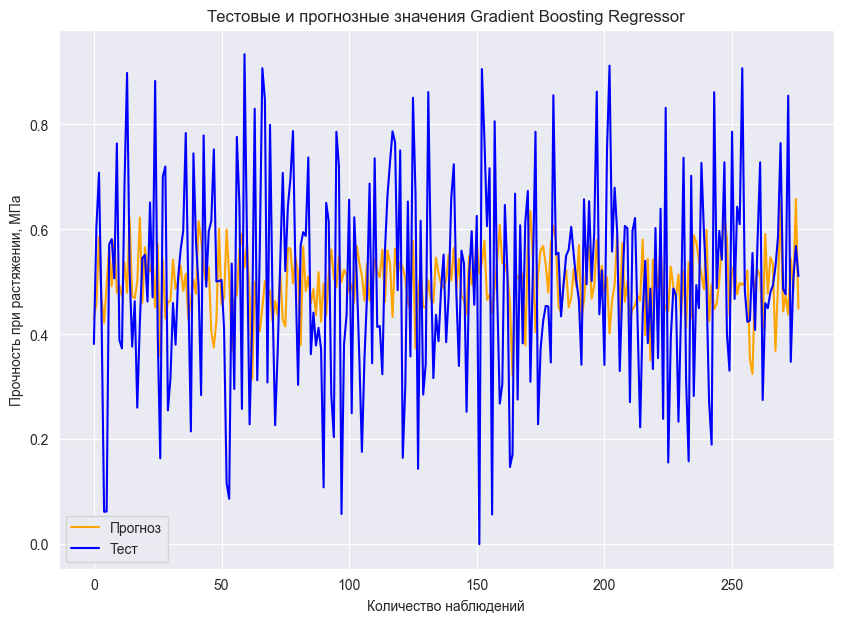

In [170]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('GrB.png', bbox_inches = 'tight')

#6.7. Показатели моделей

In [181]:
mae_df = {'Модель': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors'], 'MAE': [mae_svr, mae_rfr, mae_lr, mae_gbr, mae_knr]} 
mae_df = pd.DataFrame(mae_df)
mae_df

Модель       MAE
0     Support Vector  0.153428
1       RandomForest  0.161172
2  Linear Regression  0.155191
3   GradientBoosting  0.159931
4         KNeighbors  0.166286

#6.8. Поиск гиперпараметров

In [203]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(x_train_1, y_train_1)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 299, 'weights': 'uniform'}

In [204]:
print(gs.best_estimator_)
gs1 = gs.best_estimator_
print(f'R2-score KNR для прочности при растяжении, МПа = {gs1.score(x_test_1, y_test_1)}')

KNeighborsRegressor(n_neighbors=299)
R2-score KNR для прочности при растяжении, МПа = -0.001712524104174662


In [205]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators = 100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
]
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(), 'regressor__C': 0.01, 'regressor__gamma': 0.1}

Наилучшее значение правильности перекрестной проверки: -0.01
Правильность на тестовом наборе: -0.01


In [217]:
normalizer = Normalizer()
res = normalizer.fit_transform(merged_ds)
ds_norm_df = pd.DataFrame(res, columns = merged_ds.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    ds_norm_df.loc[:, ds_norm_df.columns != 'Модуль упругости при растяжении, ГПа'],
    merged_ds[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)
ds_norm_df.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [218]:
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

#6.9. Тестирование моделей

In [219]:
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
svr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2))) 
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2)))

Support Vector Regression Results Train:
Test score: 0.91
Support Vector Regression Results:
SVR_MAE: 4
SVR_MAPE: 0.05
SVR_MSE: 22.92
SVR_RMSE: 4.79
Test score: -1.31


In [220]:
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.5313035448559824
MSE for mean target:  9.934422413841746
RMSE for mean target:  3.1518918785138785


In [221]:
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2)))
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2)))

Random Forest Regressor Results Train:
Test score: 0.35
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.74
RF_RMSE: 3.28
Test score: -0.08


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


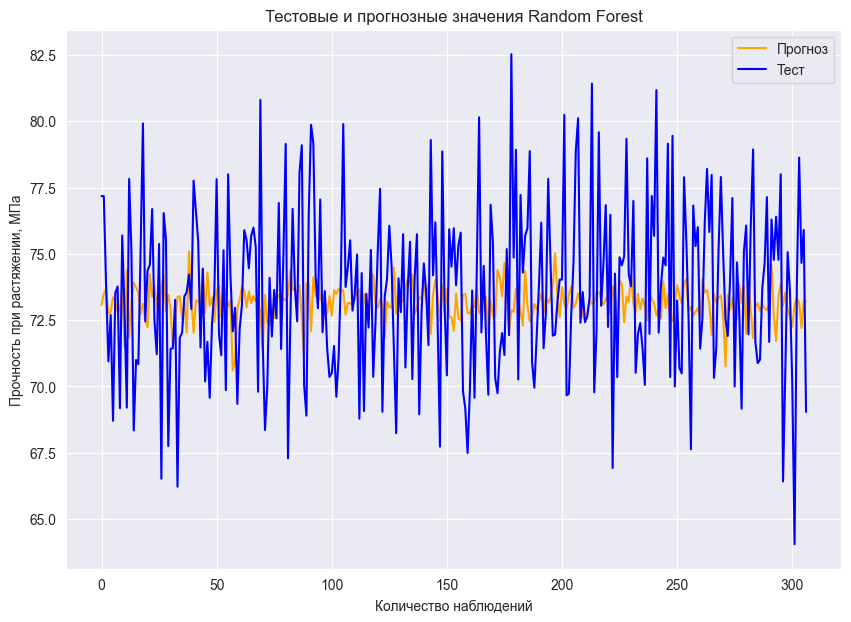

In [233]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest")
plt.plot(y2_pred_forest, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('RF.png', bbox_inches = 'tight')

In [222]:
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:')
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2)))

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.03
lr_MSE: 10.11
lr_RMSE: 3.18
Test score: -0.02


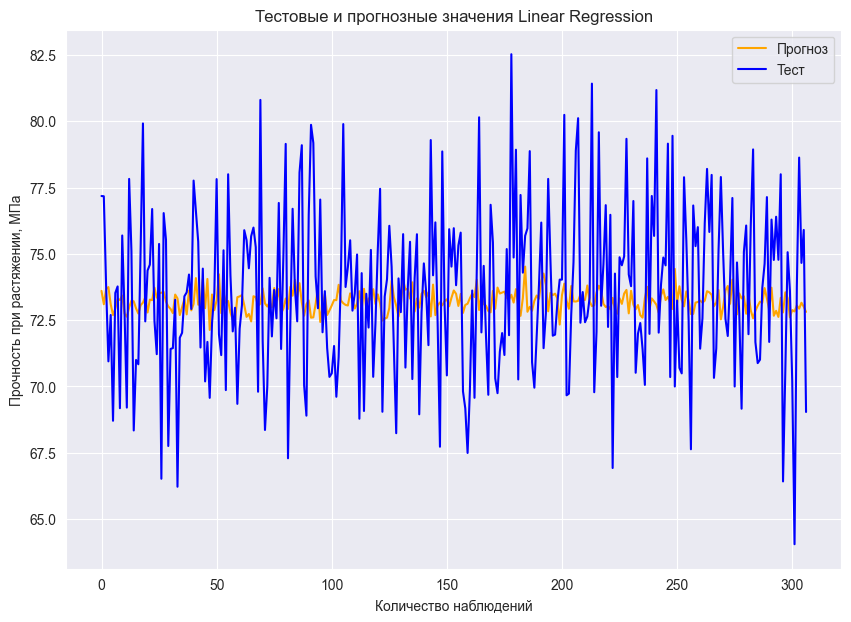

In [231]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label="Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('LR.png', bbox_inches = 'tight')

In [223]:
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2)))
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))

Gradient Boosting Regressor Results Train:
Test score: 0.51
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 11.10
GBR_RMSE: 3.33
Test score: -0.12


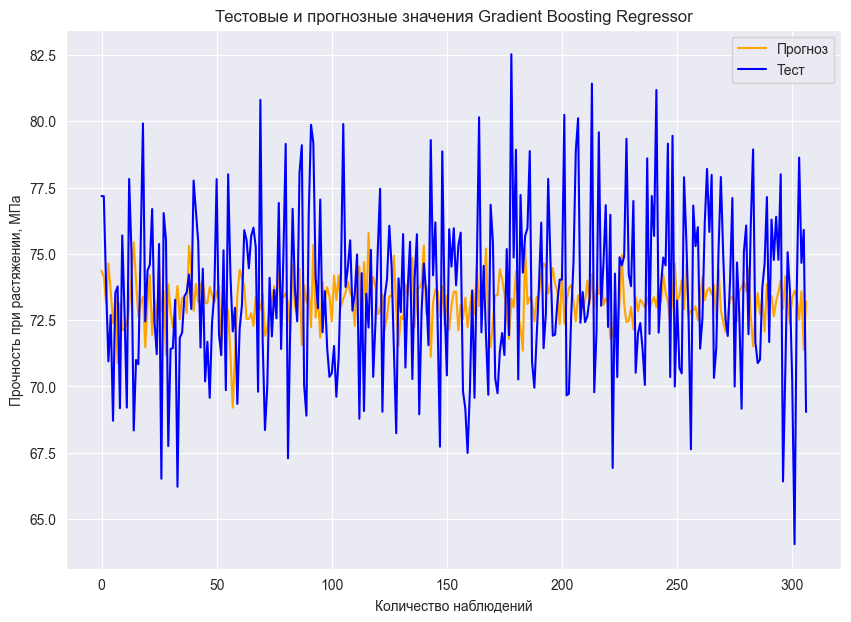

In [232]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('GrB.png', bbox_inches = 'tight')

In [224]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))

K Neighbors Regressor  Results Train:
Test score: 0.17
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 11.80
KNN_RMSE: 3.44
Test score: -0.19


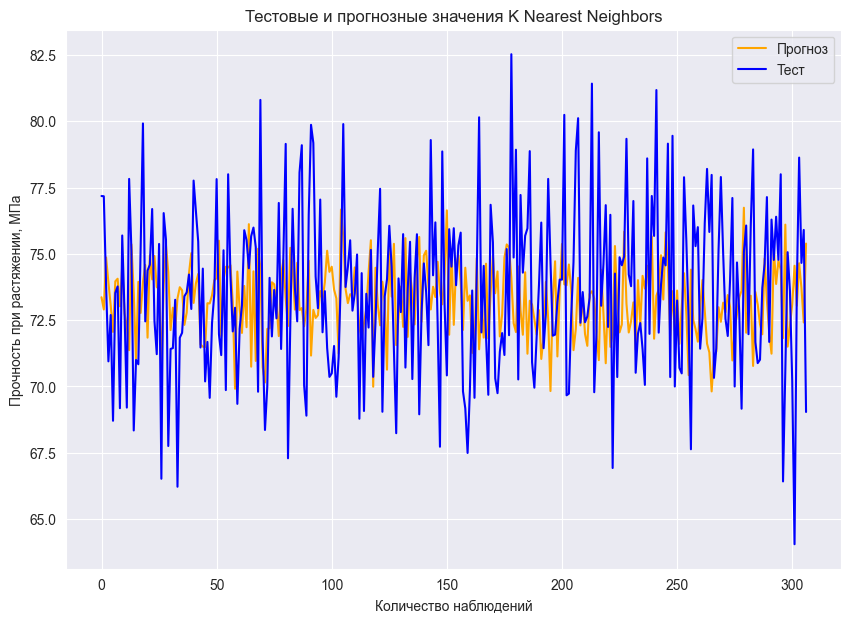

In [234]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Nearest Neighbors")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)
plt.savefig('KNN.png', bbox_inches = 'tight')

In [228]:
mae_df2 = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors'], 'MAE': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2]} 
mae_df2 = pd.DataFrame(mae_df2)
mae_df2

Регрессор       MAE
0     Support Vector  3.788417
1       RandomForest  2.630320
2  Linear Regression  2.557252
3   GradientBoosting  2.700678
4         KNeighbors  2.733367

#7. Создание нейронной сети

#7.1. Входы и выходы для модели

In [277]:
scaler = StandardScaler()
X_matrix_ratio = cleaned_ds_3.drop(columns=["Соотношение матрица-наполнитель"])
y_matrix_ratio = cleaned_ds_3["Соотношение матрица-наполнитель"]
X_matrix_ratio_scaled = pd.DataFrame(scaler.fit_transform(X_matrix_ratio), columns=X_matrix_ratio.columns)

#7.2. Разбивка на тестовые и тренировочные выборки

In [278]:
X_train_matrix_ratio, X_test_matrix_ratio, y_train_matrix_ratio, y_test_matrix_ratio = train_test_split(
    X_matrix_ratio_scaled, y_matrix_ratio, test_size=0.3, random_state=42)

#7.3. Построение модели

In [287]:
model_matrix_ratio = Sequential()
model_matrix_ratio.add(Dense(64, input_dim=X_train_matrix_ratio.shape[1], activation='relu'))

model_matrix_ratio.add(Dropout(0.3))

model_matrix_ratio.add(Dense(32, activation='relu'))

model_matrix_ratio.add(Dropout(0.3))

model_matrix_ratio.add(Dense(16, activation='relu'))

model_matrix_ratio.add(Dense(1, activation='linear'))

model_matrix_ratio.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model_matrix_ratio.fit(X_train_matrix_ratio, y_train_matrix_ratio, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

test_loss, test_mae = model_matrix_ratio.evaluate(X_test_matrix_ratio, y_test_matrix_ratio)
print(f"Test MAE: {test_mae}")

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13.3582 - mean_absolute_error: 3.4709 - val_loss: 7.1505 - val_mean_absolute_error: 2.5008
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8305 - mean_absolute_error: 2.3657 - val_loss: 3.1011 - val_mean_absolute_error: 1.5164
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3092 - mean_absolute_error: 1.5230 - val_loss: 1.4779 - val_mean_absolute_error: 1.0036
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2809 - mean_absolute_error: 1.2394 - val_loss: 1.3367 - val_mean_absolute_error: 0.9387
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1448 - mean_absolute_error: 1.1687 - val_loss: 1.3222 - val_mean_absolute_error: 0.9242
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8667 - mean_absolute_error: 1.0963 - val_loss: 1.2519 - val_mean_absolute_error: 0.8925
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9053 - mean_absolute_error: 1.0759 - val_lo

In [293]:
scores = model_matrix_ratio.evaluate(X_test_matrix_ratio, y_test_matrix_ratio)
scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9345 - mean_absolute_error: 0.7942 


[0.8897153735160828, 0.7652499079704285]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


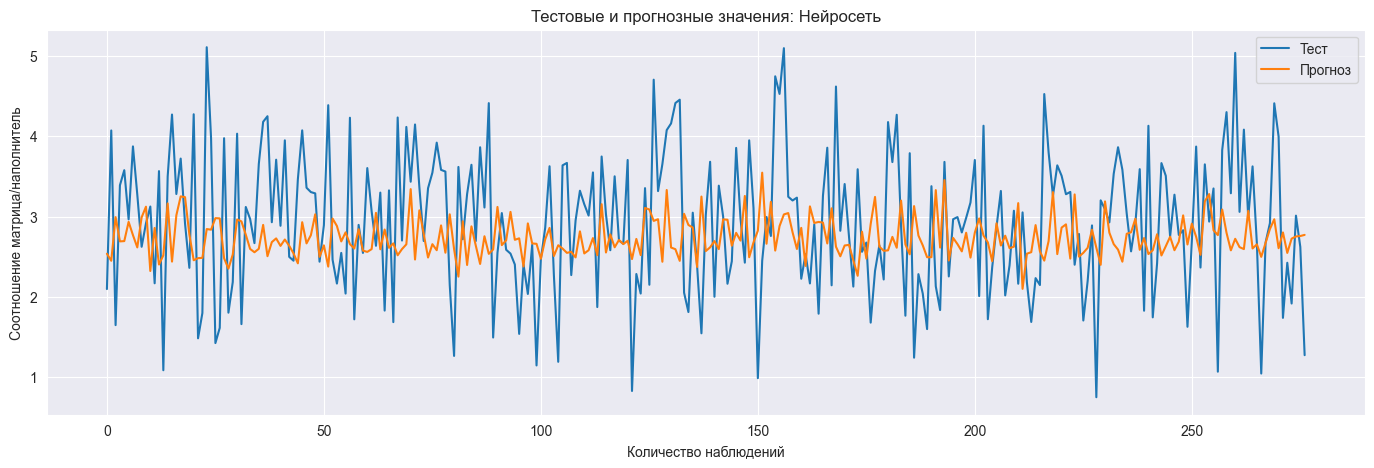

In [302]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.savefig('Neuro.png', bbox_inches = 'tight')
    plt.show()
actual_and_predicted_plot(y_test_matrix_ratio.values, model_matrix_ratio.predict(X_test_matrix_ratio.values), 'Cоотношение матрица/наполнитель', 'Нейросеть')

In [300]:
model_matrix_ratio.evaluate(X_test_matrix_ratio, y_test_matrix_ratio, verbose = 1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9345 - mean_absolute_error: 0.7942 


[0.8897153735160828, 0.7652499079704285]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


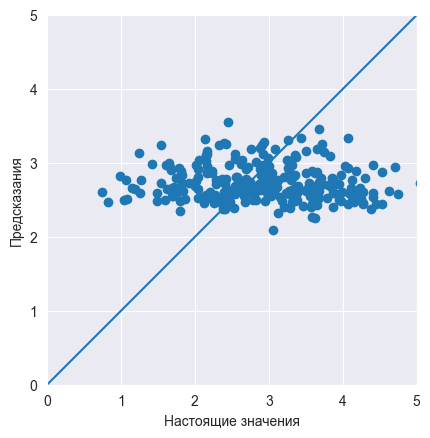

In [308]:
test_predictions = model_matrix_ratio.predict(X_test_matrix_ratio).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test_matrix_ratio, test_predictions)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказания')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
plt.savefig('Act_pred_1.png', bbox_inches = 'tight')
_ = plt.plot(lims, lims)

In [311]:
model_matrix_ratio.save('my_model.keras')

#8. Создание приложения

In [ ]:
model = load_model('C:/Users/Admin/Downloads/my_model.keras')
normalizer = Normalizer()

def predict_matrix_ratio(input_features):
    input_array = np.array(input_features).reshape(1, 1)
    input_scaled = normalizer.transform(input_array)
    prediction = model.predict(input_scaled)
    return prediction[0][0]

def console_app():
    print("Введите значения для следующих параметров:")
    feature_names = ["Угол нашивки, град", "Шаг нашивки", "Плотность нашивки", 
        "Плотность, кг/м3",  "Модуль упругости, ГПа", "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", 
        "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", 
        "Прочность при растяжении, МПа", "Потребление смолы, г/м2"]
    input_features = []
    for feature in feature_names:
        value = input(f"{feature} (оставьте пустым, если нет данных): ")
        if value == "":
            value = 0.0  
        input_features.append(float(value))
        predicted_ratio = predict_matrix_ratio(input_features)
    print(f"\nПредсказанное соотношение матрица-наполнитель: {predicted_ratio:.4f}")
if __name__ == "__main__":
    console_app()

Введите значения для следующих параметров:
